<a href="https://colab.research.google.com/github/jcj217-mc/Data201_Project_1/blob/main/Copy_of_Data201_GroupProject_Team_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [137]:
# .csv file import
# First, check  working directory
# os.getcwd()
# If need to change working directory
# os.chdir(path)
df = pd.read_csv("Accused_Pre-Trial_Inmates_in_Correctional_Facilities (1).csv", index_col=False)

## **Data Preparation and Wrangling with Pandas and Numpy**

In [138]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351849 entries, 0 to 5351848
Data columns (total 10 columns):
 #   Column                                            Dtype 
---  ------                                            ----- 
 0   DOWNLOAD DATE                                     object
 1   IDENTIFIER                                        object
 2   LATEST ADMISSION DATE                             object
 3   RACE                                              object
 4   GENDER                                            object
 5   AGE                                               int64 
 6   BOND AMOUNT                                       int64 
 7   OFFENSE                                           object
 8   FACILITY                                          object
 9   DETAINER                                          object
dtypes: int64(2), object(8)
memory usage: 408.3+ MB


In [140]:
df.describe()

,AGE,BOND AMOUNT
count,5.351849e+06,5.351849e+06
mean,3.460968e+01,2.477388e+05
std,1.139510e+01,4.502701e+05
min,1.500000e+01,1.000000e+00
25%,2.600000e+01,3.350000e+04
50%,3.300000e+01,1.000000e+05
75%,4.200000e+01,2.500000e+05
max,8.700000e+01,9.200000e+06


In [141]:
#Checking Shape
print(df.shape)

(5351849, 10)


In [142]:
#Check DataFrame type
type(df)

pandas.core.frame.DataFrame

## **Clean/Arrange Data**

In [143]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [144]:
# Drop Columns
df = df.drop(['Download_Date', 'IDENTIFIER', 'FACILITY'], axis = 'columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,DETAINER
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NONE


In [145]:
df = df.drop([df.columns[-1]], axis='columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF


In [146]:
# Checking data types for each column
print(df.dtypes)

Date       object
RACE       object
GENDER     object
AGE         int64
Bond        int64
OFFENSE    object
dtype: object


## **Addressing NA/Null Values**

In [147]:
# Check null 
df.isnull()

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5351844,False,False,False,False,False,False
5351845,False,False,False,False,False,False
5351846,False,False,False,False,False,False
5351847,False,False,False,False,False,False


In [148]:
# Null sum
df.isnull().sum()

Date       0
RACE       0
GENDER     0
AGE        0
Bond       0
OFFENSE    0
dtype: int64

## **Date/Time**

In [149]:
# Changing Date to datetime
df.Date = pd.to_datetime(df.Date)

In [150]:
# add a column for Year
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018


In [151]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [152]:
# Groupby Decade
df_decade = df.groupby(df.Year // 10 * 10).sum()
df_decade.head()

,AGE,Bond,Year
Year,,,
1980,4605,2305000,154576
1990,56690,129739550,2225173
2000,2314462,12140035808,117485939
2010,158020882,1175134161337,9260608478
2020,24829139,138454390498,1417247860


In [153]:
# Groupby Decade
df_decade_mean = df.groupby(df.Year // 10 * 10).mean()
df_decade_mean.head()

,AGE,Bond,Year
Year,,,
1980,59.038462,29551.282051,1981.743590
1990,50.888689,116462.791741,1997.462298
2000,39.521567,207302.274649,2006.180441
2010,34.423360,255991.903593,2017.336293
2020,35.390217,197345.984501,2020.074432


In [154]:
# Groupby Decade
df_decade_median = df.groupby(df.Year // 10 * 10).median()
df_decade_median.head()

,AGE,Bond,Year
Year,,,
1980,61,35000,1980
1990,49,30000,1999
2000,38,50000,2007
2010,32,100000,2018
2020,34,80000,2020


In [155]:
# importing pandas as pd
import pandas as pd
  
datetime_series = pd.Series(pd.date_range("1980-01-01", periods=3, freq="Y"))
datetime_series

0   1980-12-31
1   1981-12-31
2   1982-12-31
dtype: datetime64[ns]

In [156]:
# df.groupby(pd.(key='Date',freq='10Y')).sum()

In [157]:
df_Year = df.groupby('Year').sum()
df_Year

,AGE,Bond
Year,,
1980,3721,2135000
1988,884,170000
1993,1484,140000
1994,456,8000
1996,27491,114419050
1998,68,180000
1999,27191,14992500
2000,101180,341716800
2001,103429,187671450


In [158]:
df_Year_mean = df.groupby('Year').mean()
df_Year_mean

,AGE,Bond
Year,,
1980,61.000000,35000.000000
1988,52.000000,10000.000000
1993,53.000000,5000.000000
1994,57.000000,1000.000000
1996,54.872255,228381.337325
1998,34.000000,90000.000000
1999,47.288696,26073.913043
2000,43.220846,145970.439983
2001,42.250408,76663.174020


In [159]:
df_Year_median = df.groupby('Year').median()
df_Year_median

,AGE,Bond
Year,,
1980,61,35000
1988,52,10000
1993,53,5000
1994,57,1000
1996,60,82500
1998,34,90000
1999,48,10000
2000,43,100000
2001,41,25000


## **Looking at Types of Crime**

In [160]:
# Checking data types for each column
print(df.dtypes)

Date       datetime64[ns]
RACE               object
GENDER             object
AGE                 int64
Bond                int64
OFFENSE            object
Year                int64
dtype: object


In [161]:
# Examining Unique Entries
df.nunique()

Date       3085
RACE          5
GENDER        2
AGE          72
Bond       4121
OFFENSE     371
Year         29
dtype: int64

In [162]:
# Examining Offense Types Only
df.OFFENSE.nunique()

371

In [163]:
# Examining Offense Types
offense_array = df.OFFENSE.unique()
print(offense_array)

['CRIMINAL POSS OF PISTOL/REVOLVER      DF'
 'VIOLATION OF PROBATION OR COND DISCHG' 'CRIMINAL ATTEMPT'
 'CRIM VIOL OF PROTECTIVE ORDER         DF'
 'CRIM VIOL ST CRIM RESTR ORDER         DF'
 'ASSAULT 2ND, VICTIM 60 OR OVER        DF'
 'INTERFERING WITH AN OFFICER           AM'
 'LARCENY, SECOND DEGREE                CF'
 'MURDER                                AF'
 'ASSAULT, SECOND DEGREE                DF' 'ARREST WARRANT'
 'YOUTHFUL OFFENDER' 'UNLAWFUL RESTRAINT, FIRST DEGREE      DF'
 'LARCENY, FIRST DEGREE                 BF'
 'CRIMINAL TRESPASS, THIRD DEGREE       CM'
 'STALKING, 1ST DEGREE                  DF'
 'BURGLARY, THIRD DEGREE                DF'
 'SALE OF NARC/AMPHET BY NON-DEPENDENT   F'
 'ASSAULT 2ND DEGREE WITH A FIREARM     DF'
 'FORGERY, FIRST DEGREE                 CF' 'JUVENILE TRANSFER'
 'CONSPIRACY' 'SEXUAL ASSAULT, FIRST DEGREE           F'
 'ASSAULT ON POLICE OR FIRE OFFICER     CF'
 'FORGERY, SECOND DEGREE                DF'
 'ASSAULT 3RD DEGREE, VICTIM OVER 

In [164]:
# Convert Array into DataFrame
offense_df = pd.DataFrame(offense_array, columns=['Offense_Type'])
print(offense_df)

                                 Offense_Type
0    CRIMINAL POSS OF PISTOL/REVOLVER      DF
1       VIOLATION OF PROBATION OR COND DISCHG
2                            CRIMINAL ATTEMPT
3    CRIM VIOL OF PROTECTIVE ORDER         DF
4    CRIM VIOL ST CRIM RESTR ORDER         DF
..                                        ...
366                                    SEALED
367  INTENT TO INJURE WITH EXPLOSIVES       F
368  UNLAWFUL ENTRY INTO COIN MACHINE      AM
369  INCSTRUCTION UNLICENSED PERSON IN VEHICL
370  ASSAULT TERMINATING PREGNANCY         AF

[371 rows x 1 columns]


In [165]:
# Group by offense and bond amount
df_3 = df.groupby(['OFFENSE'], as_index=False).agg({'Bond': sum})
df_3.head()

,OFFENSE,Bond
0,(REPEALED) 53-048,332935000
1,(REPEALED) 53-124,10000
2,(REPEALED) 53-173,274750
3,53A021,883105836
4,53A223C,425900


In [166]:
df_3['Offense_Total'] = df['OFFENSE']
df_3.head()

,OFFENSE,Bond,Offense_Total
0,(REPEALED) 53-048,332935000,CRIMINAL POSS OF PISTOL/REVOLVER DF
1,(REPEALED) 53-124,10000,VIOLATION OF PROBATION OR COND DISCHG
2,(REPEALED) 53-173,274750,CRIMINAL ATTEMPT
3,53A021,883105836,CRIM VIOL OF PROTECTIVE ORDER DF
4,53A223C,425900,CRIMINAL ATTEMPT


In [167]:
# Successfully creating excel sheet with cell output
# offense_df.to_excel("./offensedf3.xlsx")

In [168]:
# load newly coded .csv 
df_2 = pd.read_csv("offensedf3.csv", index_col=False)
df_2.head()

,Unnamed: 0,Offense_Type,Category
0,0,CRIMINAL POSS OF PISTOL/REVOLVER DF,Weapons
1,1,VIOLATION OF PROBATION OR COND DISCHG,Probation
2,2,CRIMINAL ATTEMPT,Attempt
3,3,CRIM VIOL OF PROTECTIVE ORDER DF,Order
4,4,CRIM VIOL ST CRIM RESTR ORDER DF,Order


Took exported excel sheet and coded each type of offense as one of following:
1. Person
2. Property
3. Probation
4. Order (Violation of Order by Court, Police, or Municipality)
5. Drugs
6. Weapon
7. Juvenile
8. Attempt

In [169]:
# Sum of each Type of Category
df_2['Category'].value_counts()


Person       153
Property      89
Order         55
Weapons       32
Drugs         23
Attempt        7
Probation      6
ND             4
Juvenile       2
Name: Category, dtype: int64

In [170]:
# Sum of each Type of Offense
df_offense = df['OFFENSE'].value_counts()
df_offense.head(50)

VIOLATION OF PROBATION OR COND DISCHG       624816
CRIM VIOL OF PROTECTIVE ORDER         DF    271397
INJURY OR RISK OF INJURY TO MINOR      F    245038
ASSAULT, FIRST DEGREE                 BF    215743
ROBBERY, FIRST DEGREE                 BF    199466
MURDER                                AF    181229
BURGLARY, THIRD DEGREE                DF    161147
SEXUAL ASSAULT, FIRST DEGREE           F    150527
ASSAULT ON POLICE OR FIRE OFFICER     CF    127775
CRIMINAL POSSESSION OF A PISTOL       DF    120866
FAILURE TO APPEAR, FIRST DEGREE       DF    119307
SALE OF NARC/AMPHET BY NON-DEPENDENT   F    118456
CRIMINAL POSS OF PISTOL/REVOLVER      DF    115349
HOME INVASION                         AF    114861
CRIMINAL ATTEMPT                            110031
ASSAULT, THIRD DEGREE                 AM    101101
FAILURE TO APPEAR, SECOND DEGREE      AM     94753
ASSAULT, SECOND DEGREE                DF     94226
LARCENY, FIRST DEGREE                 BF     91870
LARCENY, THIRD DEGREE          

In [171]:
#Add new column with offense category
category = []
for i in df["OFFENSE"]:
    if i == ["CRIMINAL POSS OF PISTOL/REVOLVER DF"]:
        category.append("Weapons")
    elif i ==["VIOLATION OF PROBATION OR COND DISCHG"]:
        category.append("Probation")
    elif i == ["CRIMINAL ATTEMPT"]:
        category.append("Attempt")
    elif i == ["CRIM VIOL OF PROTECTIVE ORDER         DF"]:
        category.append("Order")
    elif i == ["SALE OF NARC/AMPHET BY NON-DEPENDENT   F"]:
        category.append("Drugs")
    elif i == ["LARCENY, SECOND DEGREE                CF"]:
        category.append("Property")
    elif i == ["YOUTHFUL OFFENDER"]:
        category.append("Juvenile")
    else:
        category.append("Person")
       
df["Category"] = category   
df.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year,Category
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018,Person
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019,Person
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020,Person
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020,Person
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018,Person


In [172]:
#Add new column with offense category
#category = []
# for i in df["OFFENSE"]:
#    if "PISTOL/REVOLVER" in df.OFFENSE:
#        category.append("Weapons")
#    elif "VIOLATION OF PROBATION OR COND DISCHG" in df.OFFENSE:
#        category.append("Probation")
#    elif "CRIMINAL ATTEMPT" in df.OFFENSE:
#        category.append("Attempt")
#    elif "CRIM VIOL OF PROTECTIVE ORDER         DF" in df.OFFENSE:
#        category.append("Order")
#    elif "SALE OF NARC/AMPHET BY NON-DEPENDENT   F" in df.OFFENSE:
#        category.append("Drugs")
#    elif "LARCENY, SECOND DEGREE                CF" in df.OFFENSE:
#        category.append("Property")
#    elif "YOUTHFUL OFFENDER" in df.OFFENSE:
#        category.append("Juvenile")
#    else:
#        category.append("Person")
       
# df["Category"] = category   
# df.head()

In [173]:
#if 'PISTOL/REVOLVER' in df_set.OFFENSE:
#        df_set.Category = ["Weapons"]

#df_set.head()

In [174]:
#if 'PISTOL/REVOLVER' in df_set.OFFENSE:
#		df_set["Category"] == "Weapons"
#df_set.head()

In [175]:
df['Category'].value_counts() 

Person    5351849
Name: Category, dtype: int64

## **Comparing Bond Amounts Between Groups**

In [176]:
# Overall Median for Bond Amount
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


AGE         33.0
Bond    100000.0
Year      2018.0
dtype: float64

In [177]:
# Group by Offense then Sum of each race
df_race = df['RACE'].value_counts() 
df_race.head()

BLACK       2206677
WHITE       1663676
HISPANIC    1432744
ASIAN         31994
AMER IND      16758
Name: RACE, dtype: int64

In [178]:
# Sum of bail amount by race
df_racebail = df.groupby(['RACE'], as_index=False).agg({'Bond': sum})
df_racebail.head()

,RACE,Bond
0,AMER IND,2535846250
1,ASIAN,6745403232
2,BLACK,675255067723
3,HISPANIC,367035798673
4,WHITE,274288516315


In [179]:
# mean of bail amount and age by race
df_racebailmean = df.groupby(['RACE'], as_index=False).mean()
df_racebailmean.head()

,RACE,AGE,Bond,Year
0,AMER IND,31.753730,151321.532999,2017.811433
1,ASIAN,34.839064,210833.382259,2017.406764
2,BLACK,33.234479,306005.395317,2017.452547
3,HISPANIC,33.557529,256176.817822,2017.631587
4,WHITE,37.364185,164868.950634,2017.668673


In [180]:
# median of bail amount and age by race
df_racebailmed = df.groupby(['RACE'], as_index=False).median()
df_racebailmed.head()

,RACE,AGE,Bond,Year
0,AMER IND,30,100000,2018
1,ASIAN,35,90000,2018
2,BLACK,31,125000,2018
3,HISPANIC,32,100100,2018
4,WHITE,35,60600,2018


In [181]:
# Group by Race and Year
df_race_year = df.groupby(['Year', 'RACE']).sum()
df_race_year

AGE        Bond
Year RACE                        
1980 WHITE       3721     2135000
1988 BLACK        884      170000
1993 BLACK       1484      140000
1994 WHITE        456        8000
1996 BLACK       6379    95934000
...               ...         ...
2021 AMER IND    7123    64610000
     ASIAN      13185    40070000
     BLACK     688522  4267914717
     HISPANIC  486007  2386174488
     WHITE     660120  1905107955

[94 rows x 2 columns]

In [182]:
# Group by Gender and Year
df_gender_year = df.groupby(['Year', 'GENDER']).sum()
df_gender_year

,,AGE,Bond
Year,GENDER,,
1980,M,3721,2135000
1988,M,884,170000
1993,M,1484,140000
1994,M,456,8000
1996,M,27491,114419050
1998,M,68,180000
1999,M,27191,14992500
2000,M,101180,341716800
2001,M,103429,187671450


In [184]:
# Have not yet figured out decade with another variable of race or gender - this gets error
# df_decade_race = df.groupby([(df.Year // 10 * 10), 'Race']).sum()
# df_decade_race.head()

## **EDA and Data Visualization with Matplotlib and Seaborn**

In [185]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

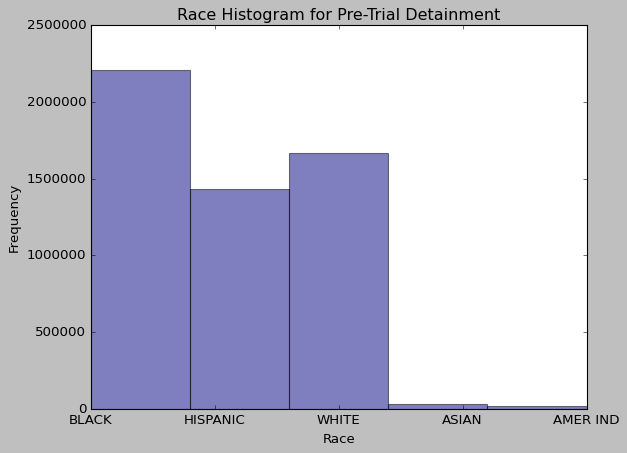

In [186]:
# Race Histogram
plt.hist(df.RACE, bins=5, facecolor='navy', alpha=0.5)
plt.title('Race Histogram for Pre-Trial Detainment')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.show()

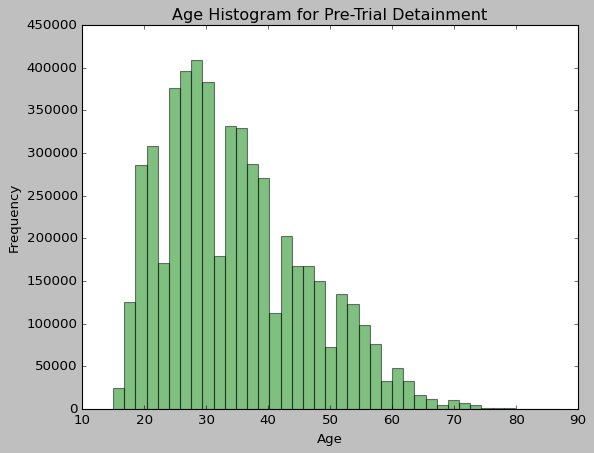

In [187]:
# Age Histogram
plt.hist(df.AGE, bins=40, facecolor='green', alpha=0.5)
plt.title('Age Histogram for Pre-Trial Detainment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


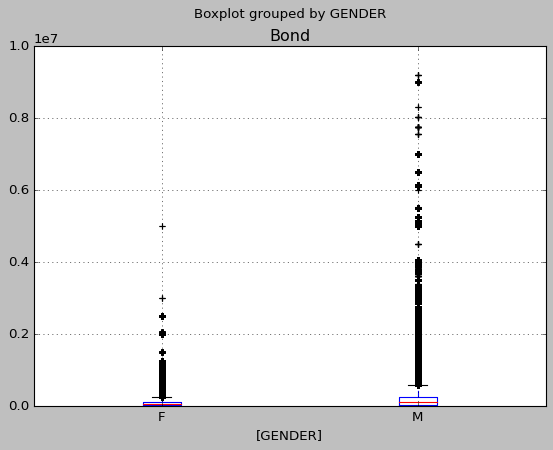

In [188]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


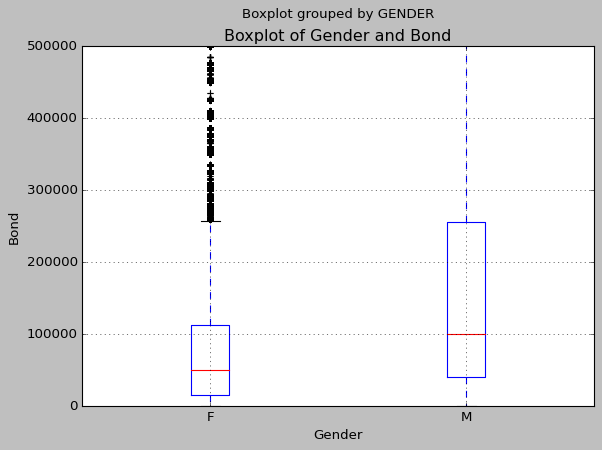

In [189]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['GENDER'])
plt.ylim(0, 500000)
plt.xlabel("Gender")
plt.ylabel("Bond")
plt.title("Boxplot of Gender and Bond")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Boxplot of Race and Bond')

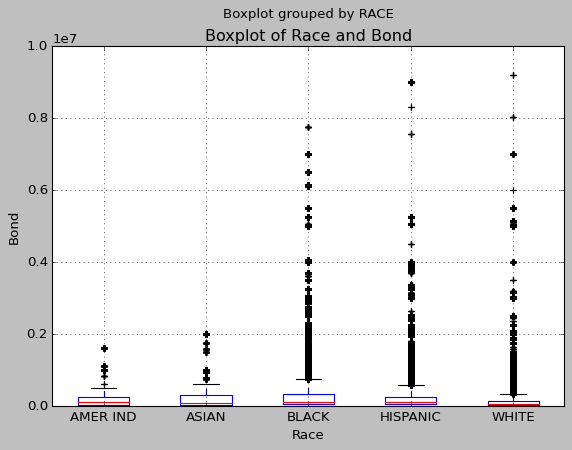

In [190]:
# Boxplot
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


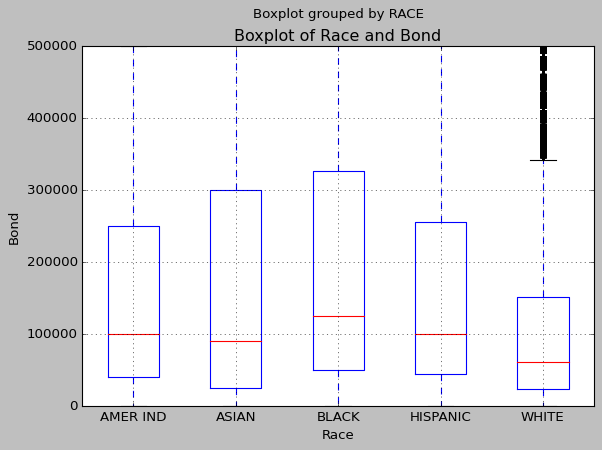

In [191]:
import seaborn as sns
boxplot = df.boxplot(column=['Bond' ], by = ['RACE'])
plt.ylim(0, 500000)
plt.xlabel("Race")
plt.ylabel("Bond")
plt.title("Boxplot of Race and Bond")
plt.show()

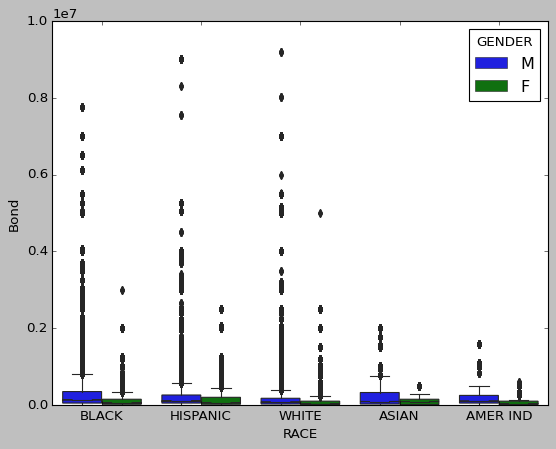

In [192]:
#Importing required modules
import seaborn as sns
import pandas as ppd
 
 
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER' , notch = True )

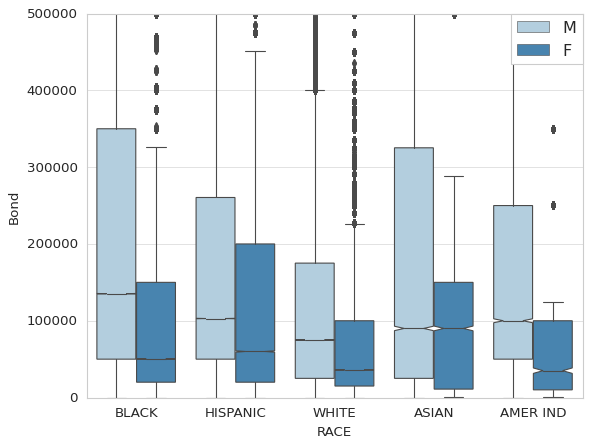

In [193]:
sns.set_style("whitegrid")
sns.boxplot(data = df , x = 'RACE' , y = 'Bond' , hue = 'GENDER', notch = True, palette="Blues")
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1,1),borderaxespad=0)
plt.ylim(0, 500000)
plt.show()

## **Simulated Nonparametric Inference of the Median, Mean and CI for Quantitative Variable - Bond Amount**

In [194]:
# Multiple functions
# grouped['C'].agg([np.sum, np.mean, np.std])

In [ ]:
#df.groupby('A').aggregate('C').mean()

In [ ]:
#df.groupby('A').C.mean()

In [195]:
# Median Bootstrapping 
bootstrap = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (1000)]})

In [196]:
bootstrap.head()

,df
0,75000.0
1,100000.5
2,78250.0
3,92500.0
4,100025.0


In [197]:
bootstrap.median()

df    100000.0
dtype: float64

In [198]:
df.Bond.median()

100000.0

In [199]:
# Median Bootstrapping 2
bootstrap2 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.median() for i in range (1000)]})

In [200]:
bootstrap2.median()

df    100000.0
dtype: float64

In [201]:
# Median Bootstrapping 3
bootstrap3 = pd.DataFrame({'df': [df.sample(1000, replace = True).Bond.median() for i in range (5000)]})

In [202]:
bootstrap3.median()

df    100000.0
dtype: float64

In [203]:
df.Bond.mean()

247738.79685189176

In [204]:
# Mean Bootstrapping 
bootstrap4 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.mean() for i in range (5000)]})
bootstrap4.mean()

df    248216.619428
dtype: float64

In [205]:
# Mean Bootstrapping 2
bootstrap5 = pd.DataFrame({'df': [df.sample(100, replace = True).Bond.mean() for i in range (5000)]})
bootstrap5.mean()

df    247889.024666
dtype: float64

In [206]:
# 95% Confidence Interval
conf_int = np.percentile(bootstrap, [2.5, 97.5]) # The middle 95% interval
conf_int



array([ 72500., 149500.])

In [207]:
conf_int = np.percentile(bootstrap2, [2.5, 97.5]) # The middle 95% interval
conf_int


array([ 75000., 150000.])

In [208]:
conf_int = np.percentile(bootstrap3, [2.5, 97.5]) # The middle 95% interval
conf_int


array([ 95000., 100050.])

In [209]:
conf_int = np.percentile(df.Bond.median(), [2.5, 97.5]) # The middle 95% interval
conf_int


array([100000., 100000.])

In [210]:
conf_int = np.percentile(bootstrap4, [2.5, 97.5]) # The middle 95% interval
conf_int


array([170534.25525, 349899.09875])

In [211]:
conf_int = np.percentile(df.Bond.mean(), [2.5, 97.5]) # The middle 95% interval
conf_int


array([247738.79685189, 247738.79685189])

In [212]:
df_bootstrap = pd.DataFrame(bootstrap, index=[0])
print(df_bootstrap)

        df
0  75000.0


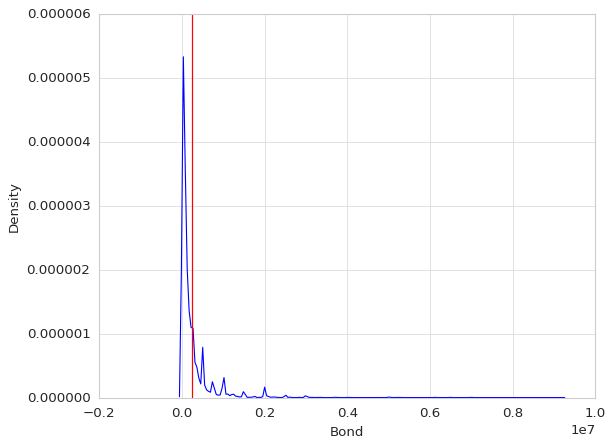

In [213]:
# Confidence Interval Graph for Dataset
import seaborn as sns
sns.kdeplot(df.Bond)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

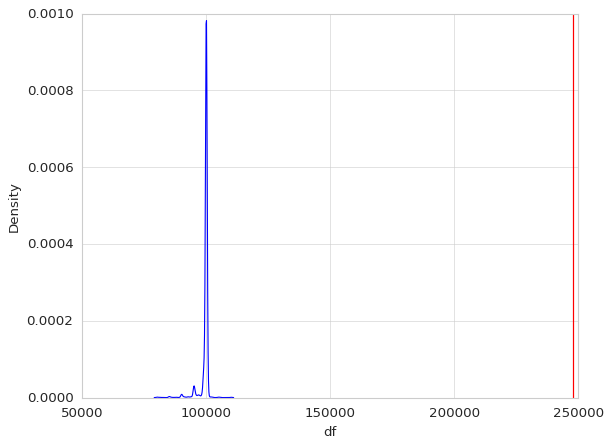

In [215]:
# Confidence Interval Graph for Bootstrap Sample
import seaborn as sns
sns.kdeplot(bootstrap3.df)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [217]:
median_boot_samples = []
for i in range(1000):
                df.Bond = np.random.choice(df.Bond, 5351849)
                median_boot_samples.append(df.Bond.median())
        
np.median(median_boot_samples)

100000.0